# EDA for wheat_spring

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.stats as stats
from patsy import dmatrices
import numpy as np

--- EDA: Correlation Analysis of All Monthly Stressors ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

Selected 28 monthly stressor variables for correlation analysis.

Generating correlation heatmap...


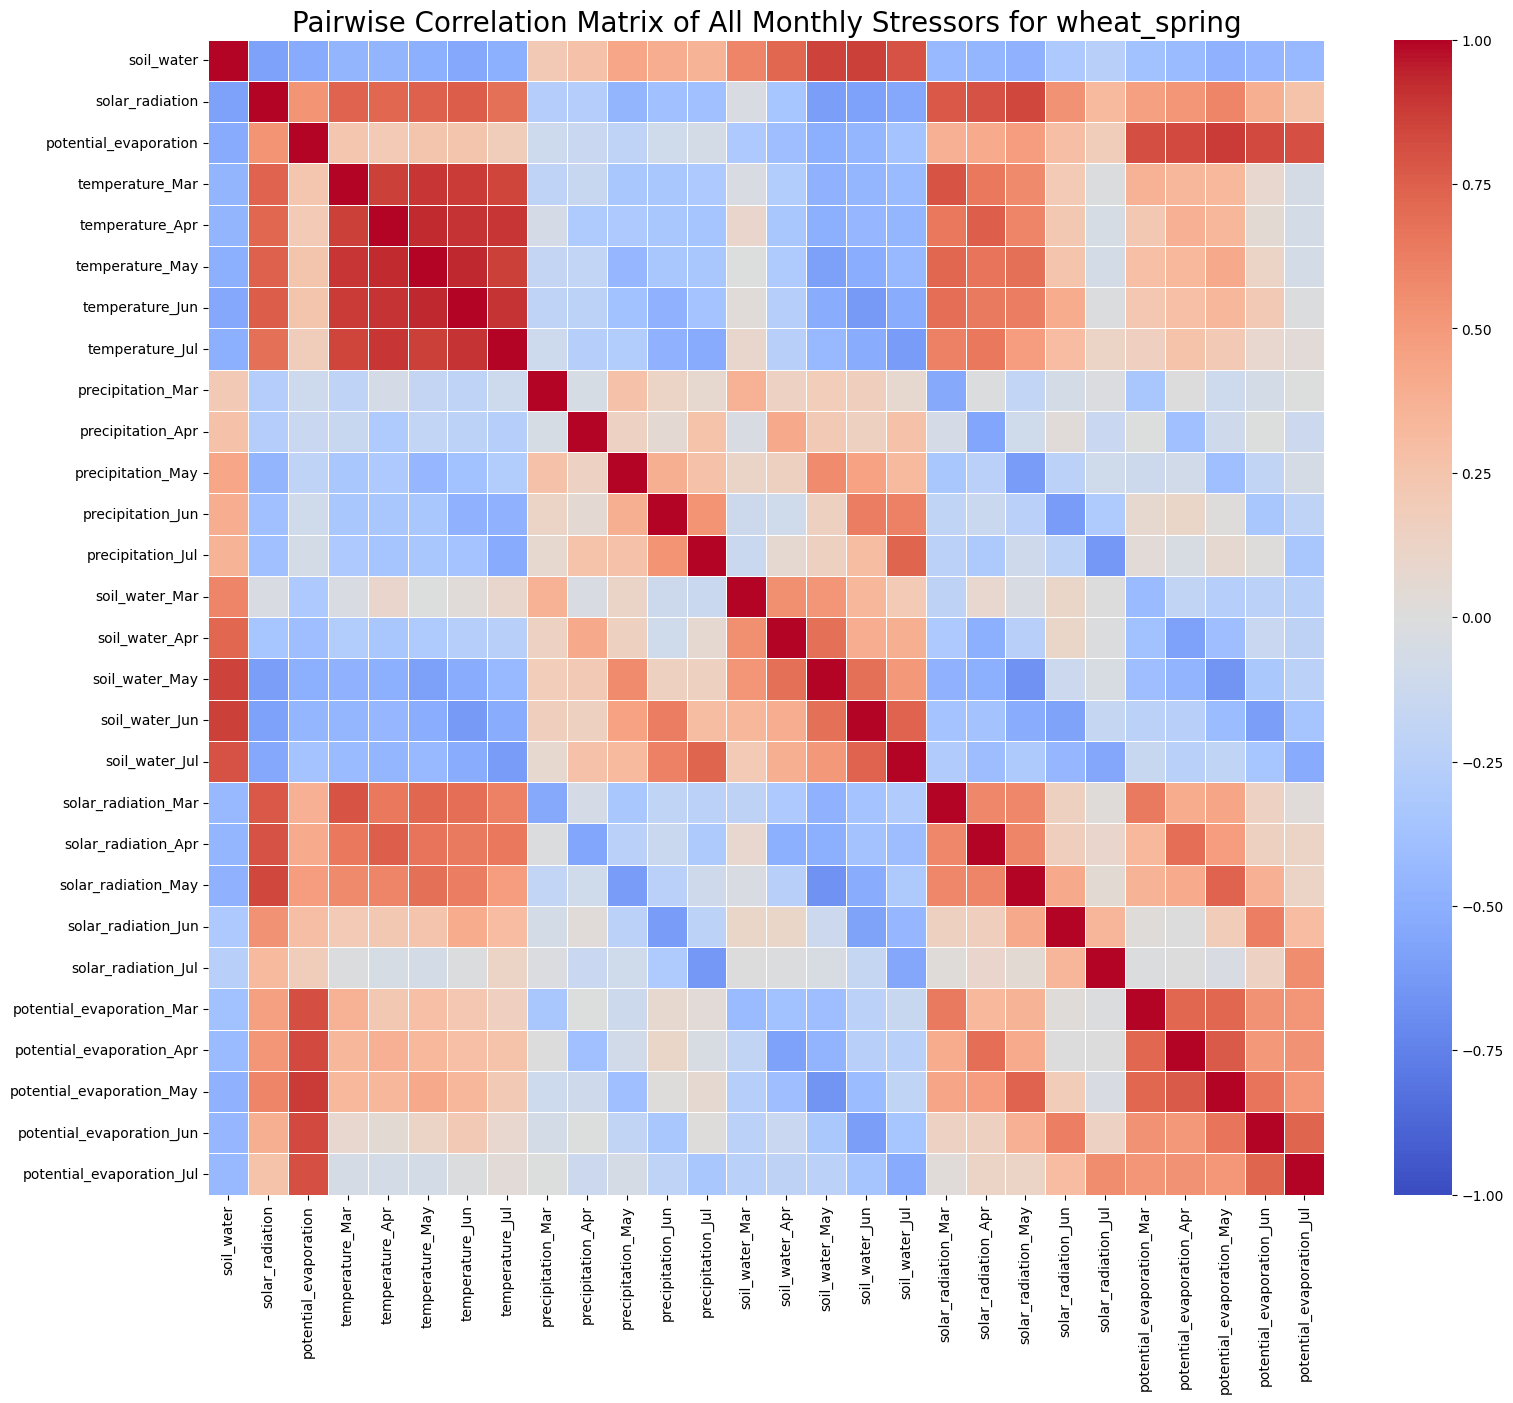

In [2]:
# Exploratory Data Analysis - Full Correlation Matrix

print("--- EDA: Correlation Analysis of All Monthly Stressors ---")

# --- 1. Load the Data ---
# As confirmed, this file is already specific to wheat_spring and its growing season.
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_spring = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}")

    # --- 2. Select Only the Monthly Stressor Variables ---
    # We will select all columns that have a month name in them, which is a robust
    # way to grab all the monthly predictors we want to investigate.
    monthly_stressors = [col for col in df_wheat_spring.columns if '_' in col and 'yield' not in col]
    df_corr = df_wheat_spring[monthly_stressors]
    
    print(f"\nSelected {len(df_corr.columns)} monthly stressor variables for correlation analysis.")

    # --- 3. Calculate and Print the Correlation Matrix ---
    correlation_matrix = df_corr.corr()
    
    # Optional: If you want to see the full numerical matrix, uncomment the next line
    # print("\n--- Full Pairwise Correlation Matrix ---")
    # print(correlation_matrix)

    # --- 4. Visualize the Matrix with a Heatmap ---
    # A heatmap is the best way to see the broad patterns of collinearity.
    print("\nGenerating correlation heatmap...")
    
    plt.figure(figsize=(18, 15))
    heatmap = sns.heatmap(
        correlation_matrix,
        cmap='coolwarm',  # Use a diverging colormap (red=positive, blue=negative)
        center=0,         # Center the colormap at zero
        vmin=-1,          # Set the color scale limits to the theoretical min/max
        vmax=1,
        linewidths=.5,
        annot=False       # Annotations are turned off as the matrix is too large to be readable
    )
    
    plt.title('Pairwise Correlation Matrix of All Monthly Stressors for wheat_spring', fontsize=20)
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Extended EDA for wheat_spring Yield Analysis ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Task 1: Analyzing the distribution of the dependent variable 'yield_wheat_spring' ---


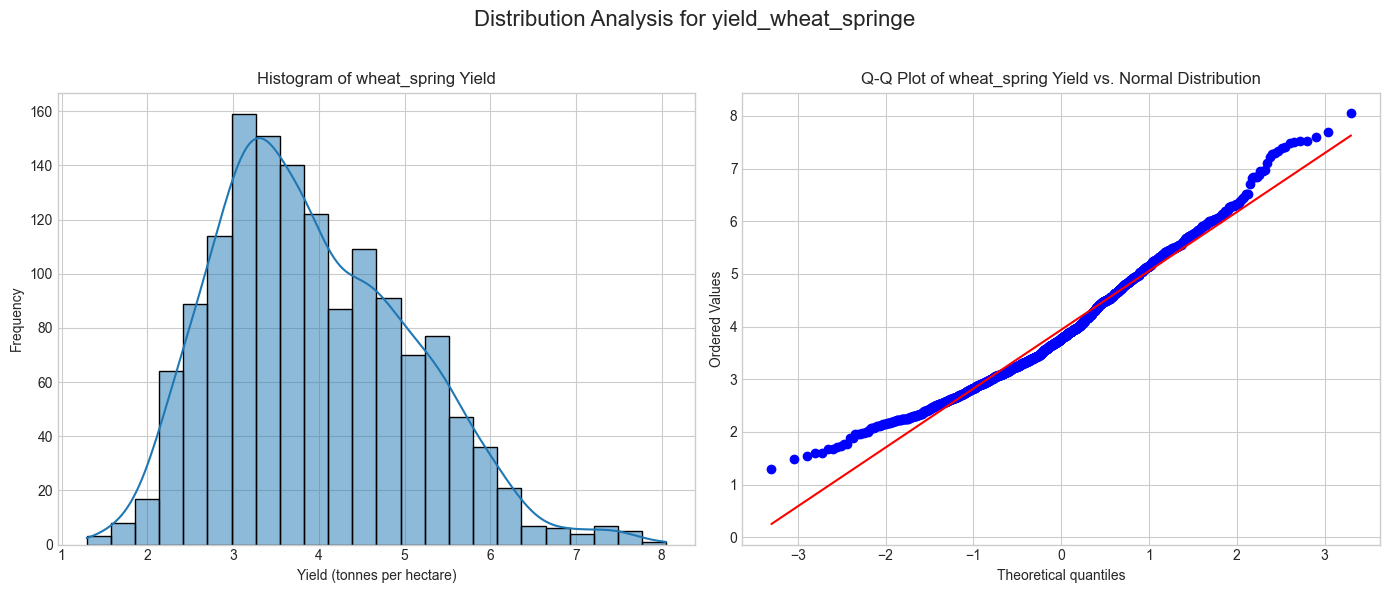

Distribution plots generated. Check for positive skew, which supports our choice of a Gamma GLM.

--- Task 2: Visualizing relationships between yield and key climate stressors ---


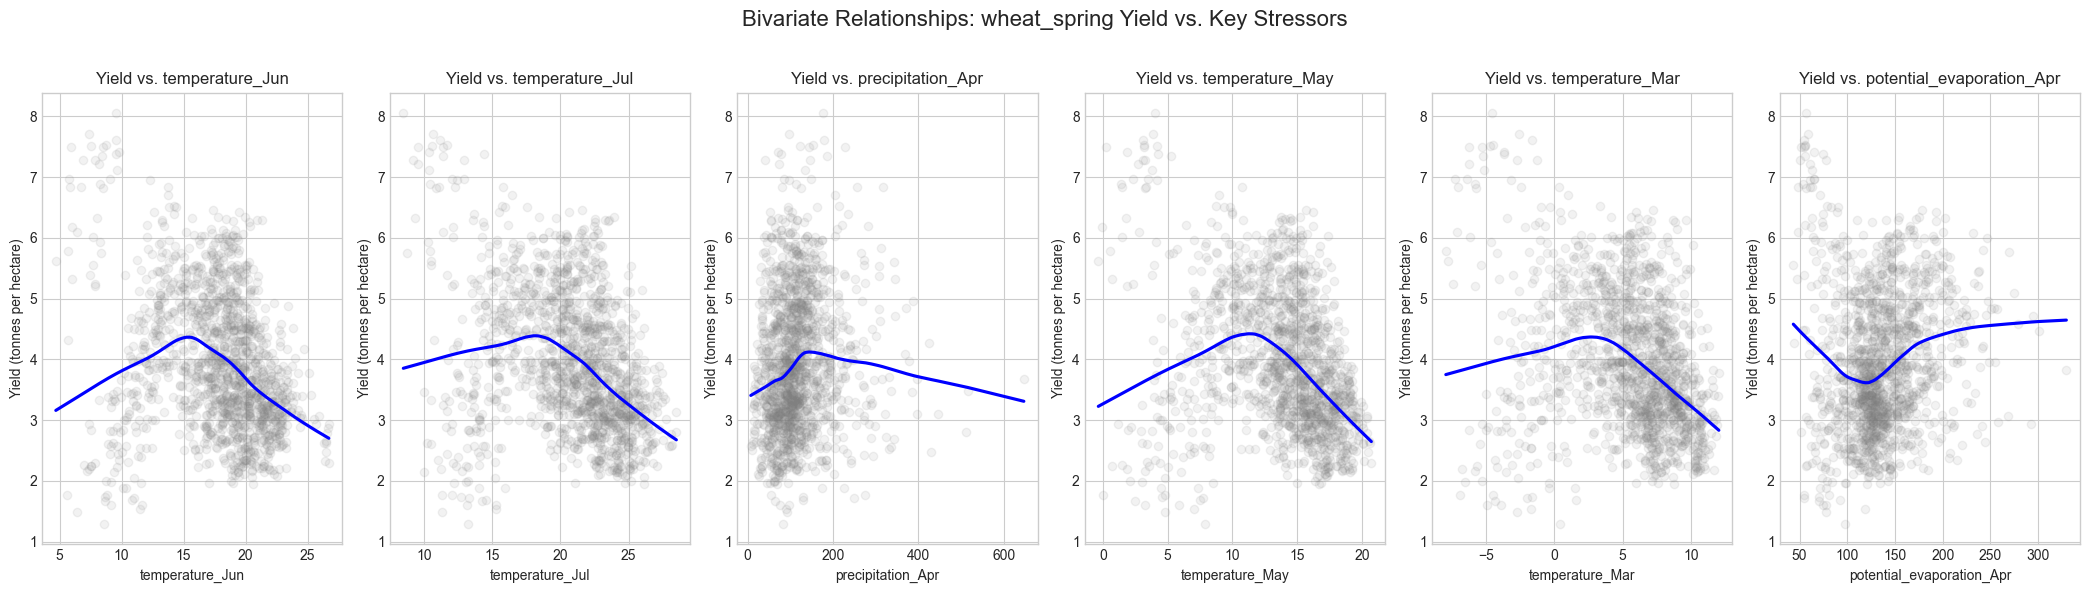

Scatter plots generated. Look for non-linear patterns that might inform our final model.

--- Task 3: Examining long-term trends in yield and a key climate variable ---


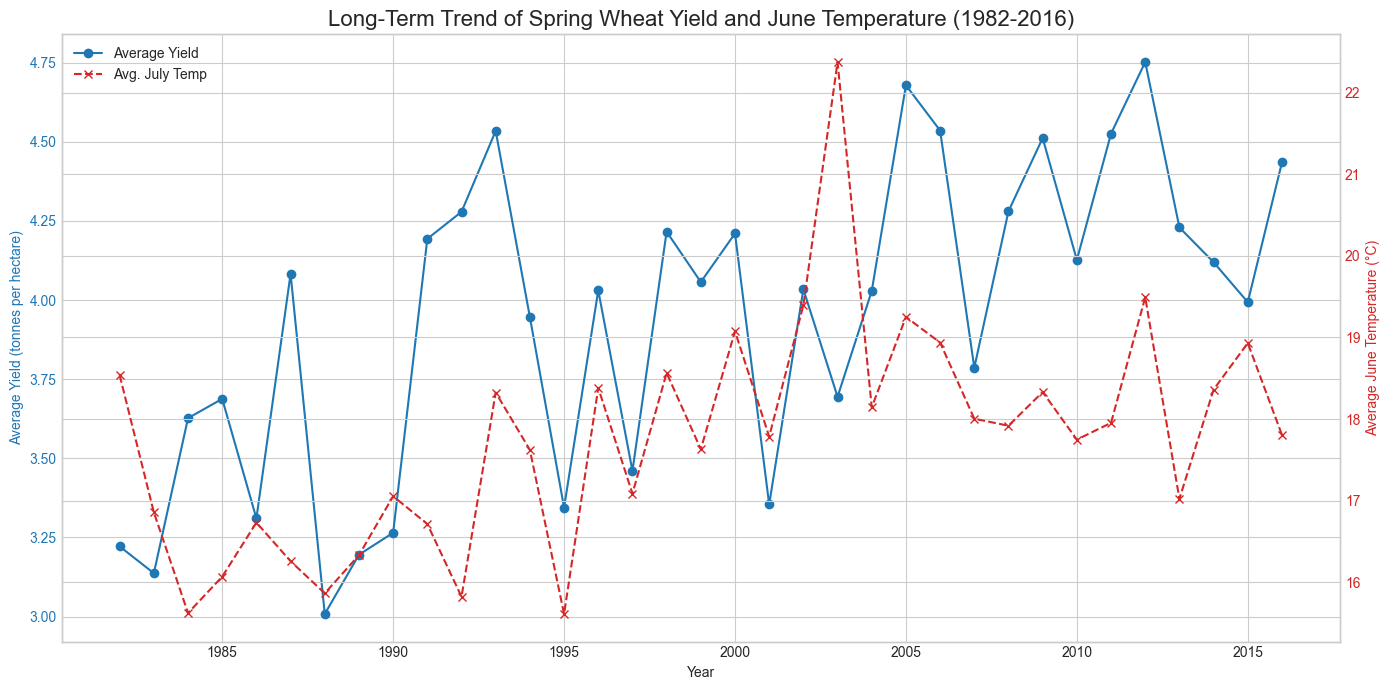

Time-series plot generated. Note the clear upward trend in yield, confirming the need for a 'year' control variable.



In [25]:
print("--- Extended EDA for wheat_spring Yield Analysis ---")

# --- 1. Load the Data ---
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_spring = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- Task 1: Examine the Distribution of the Dependent Variable (yield_wheat_spring) ---
    print("--- Task 1: Analyzing the distribution of the dependent variable 'yield_wheat_spring' ---")
    
    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Distribution Analysis for yield_wheat_springe', fontsize=16)

    # a) Histogram with a Kernel Density Estimate (KDE)
    # This helps us visually assess the shape, center, and spread of the yield data.
    # We are checking for positive skewness, which is characteristic of data modeled by a Gamma distribution.
    sns.histplot(df_wheat_spring['yield_wheat_spring'], kde=True, ax=axes[0])
    axes[0].set_title('Histogram of wheat_spring Yield')
    axes[0].set_xlabel('Yield (tonnes per hectare)')
    axes[0].set_ylabel('Frequency')

    # b) Q-Q (Quantile-Quantile) Plot against a theoretical normal distribution
    # This plot helps us assess if the data's distribution follows a specific theoretical distribution.
    # Deviations from the red line suggest skewness or heavy tails.
    # While our target is a Gamma GLM, a Q-Q plot vs. Normal is a standard first step to detect non-normality.
    stats.probplot(df_wheat_spring['yield_wheat_spring'], dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot of wheat_spring Yield vs. Normal Distribution')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("Distribution plots generated. Check for positive skew, which supports our choice of a Gamma GLM.\n")


    # --- Task 2: Bivariate Scatter Plots of Yield vs. Key Stressors ---
    print("--- Task 2: Visualizing relationships between yield and key climate stressors ---")
    
    # Select a few key stressors based on agronomic theory for wheat_spring
    key_stressors = ['temperature_Jun', 'temperature_Jul', 'precipitation_Apr', "temperature_May" , "temperature_Mar" , "potential_evaporation_Apr"]
    
    # Create a figure to hold the scatter plots
    fig, axes = plt.subplots(1, len(key_stressors), figsize=(21, 6))
    fig.suptitle('Bivariate Relationships: wheat_spring Yield vs. Key Stressors', fontsize=16)

    for i, stressor in enumerate(key_stressors):
        # We use a regression plot with a LOWESS (Locally Weighted Scatterplot Smoothing) curve.
        # This is a non-parametric way to see the underlying trend without assuming a linear relationship.
        # It's excellent for spotting potential non-linearities (like an inverted 'U' shape).
        sns.regplot(
            x=stressor,
            y='yield_wheat_spring',
            data=df_wheat_spring,
            ax=axes[i],
            lowess=True, # Use LOWESS smoother to detect non-linear patterns
            scatter_kws={'alpha': 0.1, 'color': 'gray'}, # De-emphasize individual points
            line_kws={'color': 'blue'} # Emphasize the trend line
        )
        axes[i].set_title(f'Yield vs. {stressor}')
        axes[i].set_xlabel(f'{stressor}')
        axes[i].set_ylabel('Yield (tonnes per hectare)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("Scatter plots generated. Look for non-linear patterns that might inform our final model.\n")


    # --- Task 3: Plot Key Variables Over Time ---
    print("--- Task 3: Examining long-term trends in yield and a key climate variable ---")
    
    # Calculate the mean of yield and a key stressor for each year
    yearly_data = df_wheat_spring.groupby('year')[['yield_wheat_spring', 'temperature_Jun']].mean().reset_index()

    # Create a plot with a primary and secondary y-axis to show both trends together.
    # This confirms the necessity of including 'year' as a control variable to capture trends
    # likely related to technology, while also checking for climate trends.
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plotting average yield on the primary (left) y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Yield (tonnes per hectare)', color=color)
    ax1.plot(yearly_data['year'], yearly_data['yield_wheat_spring'], color=color, marker='o', label='Average Yield')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()
    
    # Plotting average temperature on the secondary (right) y-axis
    color = 'tab:red'
    ax2.set_ylabel('Average June Temperature (°C)', color=color)
    ax2.plot(yearly_data['year'], yearly_data['temperature_Jun'], color=color, linestyle='--', marker='x', label='Avg. July Temp')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Long-Term Trend of Spring Wheat Yield and June Temperature (1982-2016)', fontsize=16)
    fig.tight_layout()
    # Adding a single legend for both lines
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.show()
    print("Time-series plot generated. Note the clear upward trend in yield, confirming the need for a 'year' control variable.\n")


except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except KeyError as e:
    print(f"ERROR: A required column was not found in the dataset: {e}. Please check the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# regularization

In [5]:
# --- 1. Load the Data ---
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_spring = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}")

    # --- 2. Define the Full Model Formula ---
    # Programmatically get all monthly stressor column names
    monthly_stressors = [col for col in df_wheat_spring.columns if '_' in col and 'yield' not in col]
    
    # Join them with '+' to create the predictor part of the formula
    stressor_formula_part = ' + '.join(monthly_stressors)
    
    # Construct the complete R-style formula string.
    # We include our controls (year, spatial splines) and all potential predictors.
    # Note: patsy's bs() function creates the basis spline columns.
    formula = f"yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + {stressor_formula_part}"
    
    print("\nGenerated model formula for patsy:")
    print(formula) # Uncomment to see the full, very long formula string

    # --- 3. Create the Design Matrix (X) and Response Vector (y) ---
    # patsy processes the formula and the dataframe to create the matrices needed for modeling.
    # 'y' will be our dependent variable, 'X' will be the full set of predictors.
    # The intercept is automatically included in 'X' by patsy.
    print("\nCreating design matrix (X) and response vector (y) using patsy...")
    y, X = dmatrices(formula, data=df_wheat_spring, return_type='dataframe')
    
    print(f"Successfully created response vector y with shape: {y.shape}")
    print(f"Successfully created design matrix X with shape: {X.shape}")
    print(f"The {X.shape[1]} columns in X include the intercept, year, 8 spline bases (4 for lat, 4 for lon), and {len(monthly_stressors)} climate stressors.")

    # --- 4. Standardize the Predictor Matrix (X) ---
    # We scale ALL predictors to have a mean of 0 and a standard deviation of 1.
    # This ensures the regularization penalty is applied fairly to all variables.
    # We do NOT scale the response variable y.
    print("\nStandardizing the design matrix X...")
    
    # We remove the Intercept column before scaling, as it should not be regularized or scaled.
    # We will add it back later if needed, but scikit-learn's models handle it by default.
    X_no_intercept = X.drop('Intercept', axis=1)
    
    scaler = StandardScaler()
    X_scaled_values = scaler.fit_transform(X_no_intercept)
    
    # Convert the scaled array back to a pandas DataFrame with the original column names
    X_scaled = pd.DataFrame(X_scaled_values, columns=X_no_intercept.columns, index=X.index)
    
    print("Standardization complete.")
    
    # Verification: Check the mean and standard deviation of a few scaled columns
    print("\n--- Verification of Standardization ---")
    verification_cols = ['year', 'bs(lat, df=4)[0]', 'temperature_Jul']
    for col in verification_cols:
        mean_val = X_scaled[col].mean()
        std_val = X_scaled[col].std()
        print(f"Column '{col}': Mean = {mean_val:.4f}, Std Dev = {std_val:.4f}")
    print("------------------------------------")
    

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded dataset from: ../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

Generated model formula for patsy:
yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + soil_water + solar_radiation + potential_evaporation + temperature_Mar + temperature_Apr + temperature_May + temperature_Jun + temperature_Jul + precipitation_Mar + precipitation_Apr + precipitation_May + precipitation_Jun + precipitation_Jul + soil_water_Mar + soil_water_Apr + soil_water_May + soil_water_Jun + soil_water_Jul + solar_radiation_Mar + solar_radiation_Apr + solar_radiation_May + solar_radiation_Jun + solar_radiation_Jul + potential_evaporation_Mar + potential_evaporation_Apr + potential_evaporation_May + potential_evaporation_Jun + potential_evaporation_Jul

Creating design matrix (X) and response vector (y) using patsy...
Successfully created response vector y with shape: (1435, 1)
Successfully created design matrix X with shape: (1435, 38)
The 38 columns i

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Successfully initialized Gamma GLM with a log link.
Will fit the model for 100 alpha values with L1_wt (l1_ratio) = 0.5


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")



Completed fitting models along the regularization path.
Generating the regularization path plot...


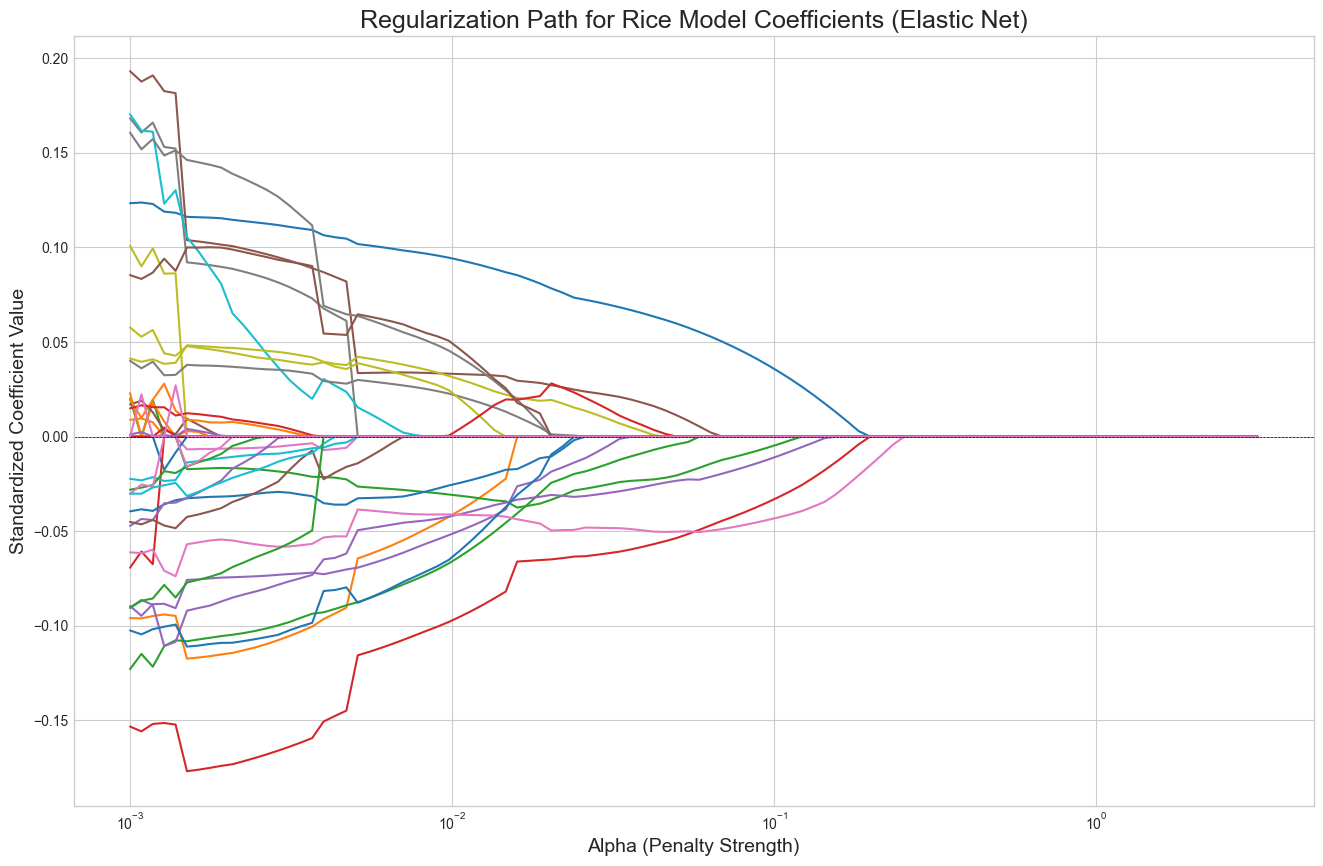

In [ ]:
# We assume 'y' and 'X_scaled' are already in memory from the previous step.
# If not, you would need to re-run the data preparation script.

try:
    # --- 1. Define the GLM Model ---
    # We specify our model family (Gamma) and the link function (log) as per our project plan.
    # We pass the prepared y and the fully scaled X matrix.
    # Note: statsmodels requires the intercept to be in the X matrix, which patsy provided.
    
    # We need to add the intercept back to the scaled data for statsmodels GLM
    X_scaled_with_intercept = X.copy() # Start with the original X to preserve intercept and structure
    X_scaled_with_intercept[X_no_intercept.columns] = X_scaled # Replace non-intercept columns with scaled versions

    gl_gamma = sm.GLM(y, X_scaled_with_intercept, family=sm.families.Gamma(link=sm.families.links.log()))
    print("Successfully initialized Gamma GLM with a log link.")

    # --- 2. Set up the Regularization Path ---
    # We need to test a series of alpha values (penalty strengths).
    # A logarithmic scale is best for this, from a weak penalty to a strong one.
    n_alphas = 100
    alphas = np.logspace(-3, 0.5, n_alphas) # From 0.001 to ~3.16

    # The L1_wt parameter controls the Elastic Net mix (0=Ridge, 1=Lasso). 
    # 0.5 is a balanced choice.
    elastic_net_l1_wt = 0.5 
    
    print(f"Will fit the model for {n_alphas} alpha values with L1_wt (l1_ratio) = {elastic_net_l1_wt}")

    # --- 3. Fit the Model for Each Alpha and Store Coefficients ---
    # We will loop through our alphas and save the coefficients from each model fit.
    coefficients = []
    
    for alpha_val in alphas:
        # The fit_regularized method performs the Elastic Net estimation.
        # We set refit=False because we want to see the shrunken coefficients for this analysis.
        results = gl_gamma.fit_regularized(
            method='elastic_net', 
            alpha=alpha_val, 
            L1_wt=elastic_net_l1_wt,
            refit=False 
        )
        coefficients.append(results.params)
    
    # Convert the list of coefficient series into a DataFrame for easy plotting
    coef_df = pd.DataFrame(coefficients, index=alphas)
    coef_df.index.name = "alpha"
    
    # Exclude the Intercept for plotting, as it's not regularized and has a different scale.
    coef_df_no_intercept = coef_df.drop('Intercept', axis=1)
    
    print("\nCompleted fitting models along the regularization path.")

    # --- 4. Visualize the Regularization Path ---
    print("Generating the regularization path plot...")
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(16, 10))

    ax.plot(coef_df_no_intercept)
    ax.set_xscale('log') # The alpha path is best viewed on a log scale
    
    # Add a vertical line at zero
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    
    ax.set_title('Regularization Path for spring Wheat Model Coefficients (Elastic Net)', fontsize=18)
    ax.set_xlabel('Alpha (Penalty Strength)', fontsize=14)
    ax.set_ylabel('Standardized Coefficient Value', fontsize=14)
    
    # To avoid a cluttered legend, we don't add one here. The goal is to see the general pattern.
    # Alternatively, for fewer variables, a legend could be useful:
    # ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

    plt.show()

except NameError:
    print("ERROR: Make sure that 'y' and 'X_scaled' DataFrames from the previous step are available in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [15]:
# --- Corrected code to identify the most robust variables ---
# We will inspect the coefficients at a moderately high alpha value
# This tells us which variables "survived" the penalty the longest.
alpha_to_inspect = 0.03

try:
    # Find the alpha in our index that is closest to our target
    # CORRECTED LINE: The operation works directly on the index without .flat
    closest_alpha = coef_df.index[np.abs(coef_df.index - alpha_to_inspect).argmin()]

    print(f"--- Coefficients at alpha ≈ {closest_alpha:.4f} ---")

    # Get the coefficients at this alpha and sort them by absolute value
    robust_coeffs = coef_df.loc[closest_alpha].copy()
    robust_coeffs_sorted = robust_coeffs.abs().sort_values(ascending=False)

    print("\nVariables sorted by the absolute magnitude of their shrunken coefficient:")
    # We display more variables to get a fuller picture
    print(robust_coeffs_sorted.head(15))

    # Let's also see their actual values (positive or negative) for the top variables
    print("\n--- Actual coefficient values for the most robust variables ---")
    print(coef_df.loc[closest_alpha, robust_coeffs_sorted.index].head(15))

except NameError:
     print("ERROR: Make sure that 'coef_df' DataFrame from the previous step is available in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Coefficients at alpha ≈ 0.0305 ---

Variables sorted by the absolute magnitude of their shrunken coefficient:
Intercept                    1.323091
year                         0.069772
bs(lat, df=4)[2]             0.061634
temperature_Jul              0.048290
temperature_May              0.029767
bs(lat, df=4)[1]             0.025259
bs(lon, df=4)[0]             0.021998
potential_evaporation_Apr    0.014398
temperature_Mar              0.014389
precipitation_Apr            0.009319
bs(lat, df=4)[3]             0.004789
bs(lat, df=4)[0]             0.000000
bs(lon, df=4)[2]             0.000000
bs(lon, df=4)[3]             0.000000
potential_evaporation        0.000000
Name: 0.030538555088334154, dtype: float64

--- Actual coefficient values for the most robust variables ---
Intercept                    1.323091
year                         0.069772
bs(lat, df=4)[2]            -0.061634
temperature_Jul             -0.048290
temperature_May             -0.029767
bs(lat, df=4)[1]  

# modelling

In [17]:
print("--- Fitting the Base Champion Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_spring = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the base Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    base_formula = "yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + temperature_Jul + temperature_May + temperature_Mar + potential_evaporation_Apr + precipitation_Apr"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    base_model = smf.glm(
        formula=base_formula,
        data=df_wheat_spring,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    base_model_results = base_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the Base Champion Model ---")
    print(base_model_results.summary())

    # --- 4. Print AIC for Future Comparison ---
    # The AIC is a key metric for comparing different model formulations. Lower is better.
    print("\n" + "="*80)
    print(f"AIC for Base Champion Model: {base_model_results.aic:.2f}")
    print("This will be our benchmark for comparison.")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the Base Champion Model ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Base Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:     yield_wheat_spring   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1420
Model Family:                   Gamma   Df Model:                           14
Link Function:                    log   Scale:                        0.044801
Method:                          IRLS   Log-Likelihood:                -1744.4
Date:                Tue, 18 Nov 2025   Deviance:                       66.316
Time:                        20:20:04   Pearson chi2:                     63.6
No. Iterations:                    16   Pseudo R-squ. (CS):             0.5531
Covariance Type:            nonrobust                                         
    

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


# quadratic terms

In [29]:
print("--- Fitting the Quadratic Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_spring = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the base Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    quadratic_formula = "yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + temperature_Jul + I(temperature_Jul**2) + temperature_May + I(temperature_May**2) + temperature_Mar + potential_evaporation_Apr + precipitation_Apr + I(precipitation_Apr**2)"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    quadratic_model = smf.glm(
        formula=quadratic_formula,
        data=df_wheat_spring,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    quadratic_model_results = quadratic_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the Base Champion Model ---")
    print(quadratic_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3516.86).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Quadratic Model: {quadratic_model_results.aic:.2f}")
    print("Compare this to the Base Model's AIC (3518.87).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the Quadratic Model ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the Base Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:     yield_wheat_spring   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1417
Model Family:                   Gamma   Df Model:                           17
Link Function:                    log   Scale:                        0.044535
Method:                          IRLS   Log-Likelihood:                -1722.9
Date:                Tue, 18 Nov 2025   Deviance:                       64.385
Time:                        20:41:19   Pearson chi2:                     63.1
No. Iterations:                    17   Pseudo R-squ. (CS):             0.5685
Covariance Type:            nonrobust                                         
        

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


# interractions

In [31]:
print("--- Fitting the Quadratic Model ---")

# --- 1. Load the Data ---
# We use the original dataframe for this step.
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat_spring = pd.read_csv(file_path)
    print(f"Successfully loaded dataset from: {file_path}\n")

    # --- 2. Define and Fit the base Model ---
    # This formula contains only the variables that proved robust in the regularization step.
    # We use statsmodels.formula.api which simplifies fitting models from a formula string.
    interaction_formula = "yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + temperature_May:temperature_Jul + temperature_Jul + I(temperature_Jul**2) + temperature_May + I(temperature_May**2) + temperature_Mar + potential_evaporation_Apr + precipitation_Apr + I(precipitation_Apr**2)"

    # Initialize the GLM model using the formula and the dataframe.
    # Specify the Gamma family with a log link as planned.
    interaction_model = smf.glm(
        formula=interaction_formula,
        data=df_wheat_spring,
        family=sm.families.Gamma(link=sm.families.links.log())
    )

    # Fit the model. This is the standard, un-penalized fit.
    interaction_model_results = interaction_model.fit()

    # --- 3. Print the Full Summary for Interpretation ---
    # This summary is now statistically valid and is the basis for our interpretation.
    print("--- Summary of the interaction Champion Model ---")
    print(interaction_model_results.summary())

    # --- 4. Print AIC for Comparison ---
    # We will compare this AIC to our current champion's AIC (3516.86).
    # A lower AIC will indicate that capturing the non-linear effect is an improvement.
    print("\n" + "="*80)
    print(f"AIC for Interaction Model: {interaction_model_results.aic:.2f}")
    print("Compare this to the quadratic Model's AIC (3481.75).")
    print("="*80)

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Fitting the Quadratic Model ---
Successfully loaded dataset from: ../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv

--- Summary of the interaction Champion Model ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:     yield_wheat_spring   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1416
Model Family:                   Gamma   Df Model:                           18
Link Function:                    log   Scale:                        0.044174
Method:                          IRLS   Log-Likelihood:                -1714.9
Date:                Tue, 18 Nov 2025   Deviance:                       63.680
Time:                        20:57:47   Pearson chi2:                     62.6
No. Iterations:                    18   Pseudo R-squ. (CS):             0.5762
Covariance Type:            nonrobust                                         
 

c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


## visualization

--- Generating Final Yield Response Curves for Spring Wheat ---
Data prepared successfully.
Fitting Final Champion model for Spring Wheat...
Model fitted successfully. AIC: 3467.84

Generating plot: Non-Linear Yield Response to temperature_Jul...


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


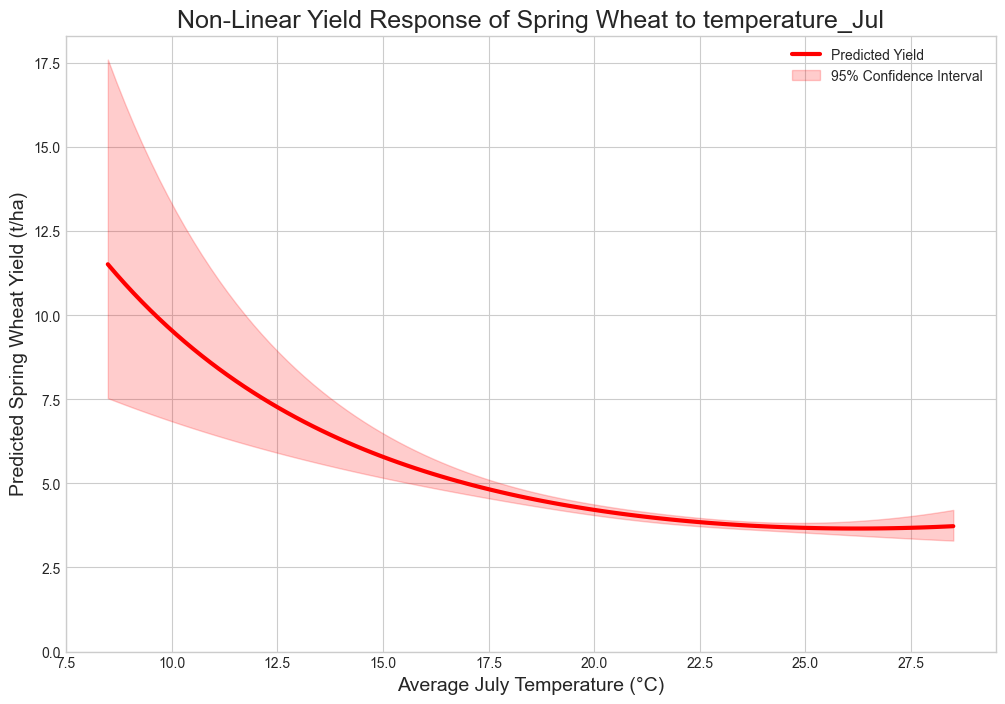


Generating plot: Non-Linear Yield Response to temperature_May...


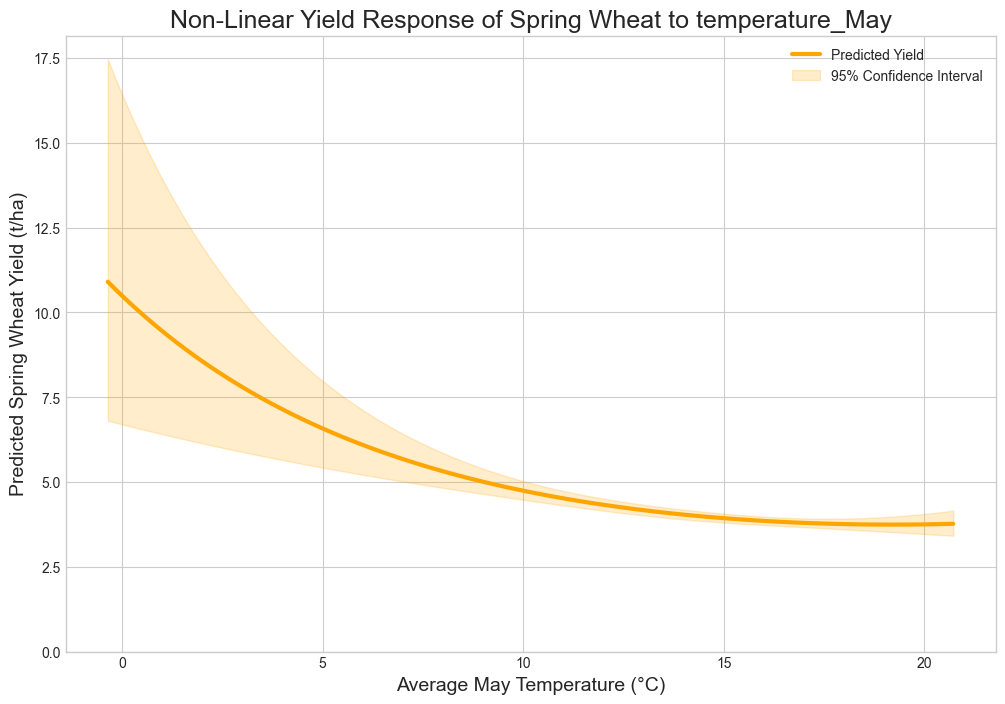


Generating plot: Non-Linear Yield Response to precipitation_Apr...


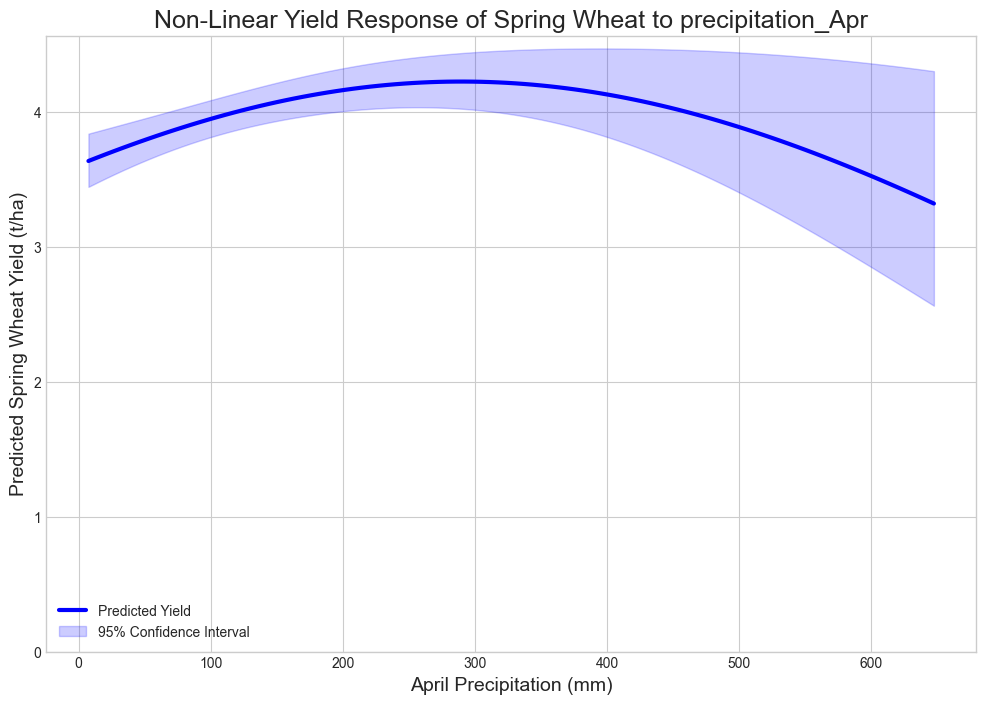


Generating Plot D: The "Compounding Heat Stress" Interaction Effect...


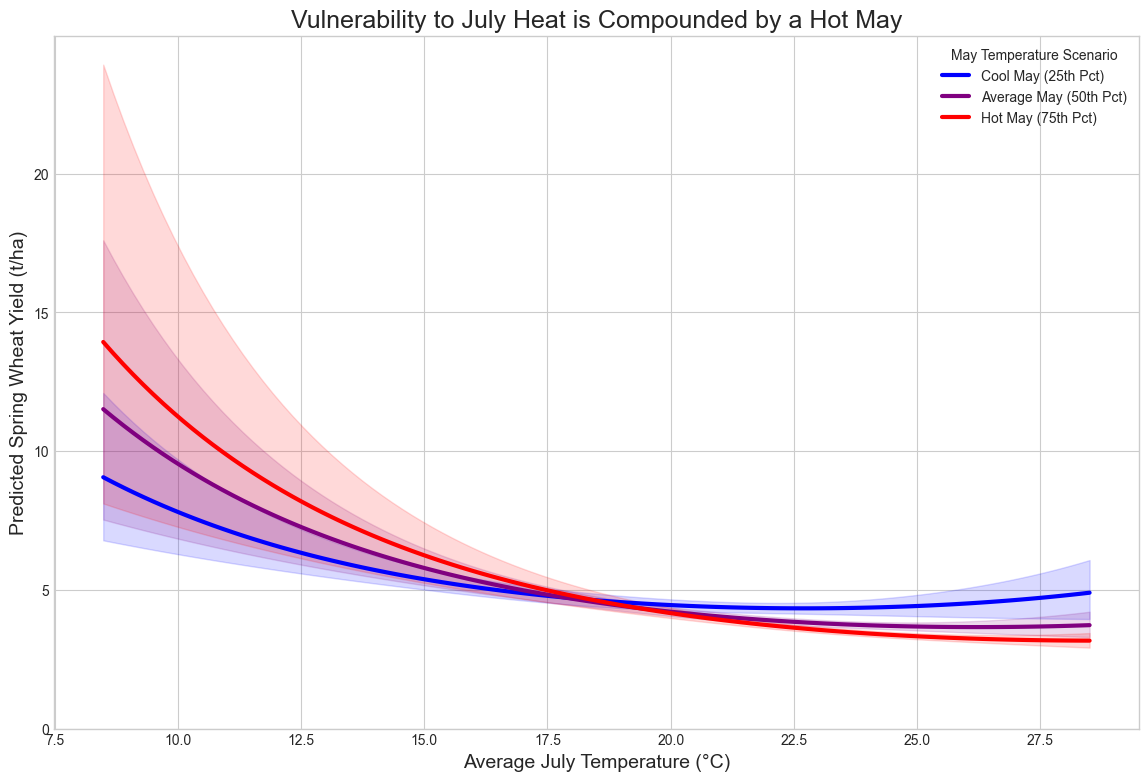

In [32]:
print("--- Generating Final Yield Response Curves for Spring Wheat ---")

# --- 1. Load and Prepare Data ---
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'
df_wheat = pd.read_csv(file_path)
df_wheat = df_wheat[df_wheat['yield_wheat_spring'] > 0].copy()
print("Data prepared successfully.")

# --- 2. Fit Our Final Champion Model ---
final_champion_formula = """
    yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                         temperature_Jul + I(temperature_Jul**2) + 
                         temperature_May + I(temperature_May**2) + 
                         temperature_Mar + potential_evaporation_Apr + 
                         precipitation_Apr + I(precipitation_Apr**2) +
                         temperature_May:temperature_Jul
"""
print("Fitting Final Champion model for Spring Wheat...")
final_model = smf.glm(
    formula=final_champion_formula,
    data=df_wheat,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()
print(f"Model fitted successfully. AIC: {final_model.aic:.2f}")


# --- 3. Prepare a Base Prediction Dictionary with Median Values ---
median_values = {
    'year': df_wheat['year'].median(),
    'lat': df_wheat['lat'].median(),
    'lon': df_wheat['lon'].median(),
    'temperature_Jul': df_wheat['temperature_Jul'].median(),
    'temperature_May': df_wheat['temperature_May'].median(),
    'temperature_Mar': df_wheat['temperature_Mar'].median(),
    'potential_evaporation_Apr': df_wheat['potential_evaporation_Apr'].median(),
    'precipitation_Apr': df_wheat['precipitation_Apr'].median()
}
sns.set_style("whitegrid")


# --- PLOTS A, B, C: The Three Non-Linear Main Effects ---
# We create a dictionary to loop through, making the code cleaner
plots_to_make = {
    'temperature_Jul': {'color': 'red', 'xlabel': 'Average July Temperature (°C)'},
    'temperature_May': {'color': 'orange', 'xlabel': 'Average May Temperature (°C)'},
    'precipitation_Apr': {'color': 'blue', 'xlabel': 'April Precipitation (mm)'}
}

for var, props in plots_to_make.items():
    print(f"\nGenerating plot: Non-Linear Yield Response to {var}...")
    
    x_range = np.linspace(df_wheat[var].min(), df_wheat[var].max(), 100)
    pred_df = pd.DataFrame(median_values, index=range(100))
    pred_df[var] = x_range
    
    preds = final_model.get_prediction(pred_df).summary_frame(alpha=0.05)
    
    plt.figure(figsize=(12, 8))
    plt.plot(pred_df[var], preds['mean'], color=props['color'], linewidth=3, label='Predicted Yield')
    plt.fill_between(pred_df[var], preds['mean_ci_lower'], preds['mean_ci_upper'], color=props['color'], alpha=0.2, label='95% Confidence Interval')
    
    plt.title(f'Non-Linear Yield Response of Spring Wheat to {var}', fontsize=18)
    plt.xlabel(props['xlabel'], fontsize=14)
    plt.ylabel('Predicted Spring Wheat Yield (t/ha)', fontsize=14)
    plt.legend(); plt.ylim(bottom=0); plt.show()


# --- PLOT D: The "Money Plot" - Compounding Heat Stress Interaction ---
print('\nGenerating Plot D: The "Compounding Heat Stress" Interaction Effect...')

# Define the scenarios for May temperature
temp_may_quantiles = df_wheat['temperature_May'].quantile([0.25, 0.5, 0.75])
scenarios = {
    'Cool May (25th Pct)': {'value': temp_may_quantiles[0.25], 'color': 'blue'},
    'Average May (50th Pct)': {'value': temp_may_quantiles[0.50], 'color': 'purple'},
    'Hot May (75th Pct)': {'value': temp_may_quantiles[0.75], 'color': 'red'}
}

x_range_jul = np.linspace(df_wheat['temperature_Jul'].min(), df_wheat['temperature_Jul'].max(), 100)

plt.figure(figsize=(14, 9))
for scenario_name, props in scenarios.items():
    pred_df_interact = pd.DataFrame(median_values, index=range(100))
    pred_df_interact['temperature_Jul'] = x_range_jul  # Vary July temp on x-axis
    pred_df_interact['temperature_May'] = props['value'] # Set the May temp for this scenario
    
    preds_interact = final_model.get_prediction(pred_df_interact).summary_frame(alpha=0.05)
    
    plt.plot(pred_df_interact['temperature_Jul'], preds_interact['mean'], color=props['color'], linewidth=3, label=scenario_name)
    plt.fill_between(pred_df_interact['temperature_Jul'], preds_interact['mean_ci_lower'], preds_interact['mean_ci_upper'], color=props['color'], alpha=0.15)

plt.title('Vulnerability to July Heat is Compounded by a Hot May', fontsize=18)
plt.xlabel('Average July Temperature (°C)', fontsize=14)
plt.ylabel('Predicted Spring Wheat Yield (t/ha)', fontsize=14)
plt.legend(title='May Temperature Scenario'); plt.ylim(bottom=0); plt.show()

### **Analysis of Spring Wheat Yield Response Curves**

These plots visualize the key relationships from our final, complex statistical model. They show how predicted spring wheat yield responds to specific climate factors, holding all others at their typical values.

#### **Plots 1 & 2: The Dominance of Heat Stress (`temperature_Jul` & `temperature_May`)**

*   **Primary Finding:** Higher temperatures in both May and July are consistently and significantly associated with lower yields.
*   **Interpretation:** Both plots show a similar pattern: a steep decline in yield as temperatures rise. The slight curve reveals a subtle inverted U-shape, but the peak occurs at very cool temperatures. This indicates that for the vast majority of observed conditions, the primary effect of temperature in May and July is **heat stress**.

#### **Plot 3: The Optimal Level of Early-Season Rain (`precipitation_Apr`)**

*   **Primary Finding:** The relationship with April precipitation is a distinct **inverted U-shape**.
*   **Interpretation:** The model shows that yield is maximized at a moderate level of spring rainfall (approx. 200-250 mm). This demonstrates a "too much of a good thing" effect, where both drought conditions (too little rain) and waterlogging/oversaturation (too much rain) are detrimental to crop establishment.

#### **Plot 4: The Core Insight - Compounding Heat Stress**

*   **Primary Finding:** The plant's vulnerability to heat stress in July is **compounded by heat stress experienced in May.**
*   **Interpretation:** This plot visualizes our most sophisticated finding. It shows the yield response to July heat under three different May temperature scenarios.
    *   The **red line ("Hot May")** has the steepest downward slope. This is the visual proof that a plant "pre-stressed" by a hot May suffers the most severe yield losses when it also faces a hot July.
    *   Conversely, the **blue line ("Cool May")** is the flattest. This demonstrates that a plant that enjoys a mild May is more **resilient**, suffering a much smaller yield penalty when faced with the same level of July heat. This quantifies the critical, compounding nature of heat stress across different growth stages.

--- Generating Final Vulnerability Curves for Spring Wheat ---
Data prepared successfully.
Final champion model for Spring Wheat fitted successfully. AIC: 3467.84

Predicted baseline yield for a typical case (median May, median July): 3.97 t/ha
Generating the vulnerability curve plot...


c:\Users\esthe\anaconda3\envs\climarisc\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


An unexpected error occurred: name 'PercentFormatter' is not defined


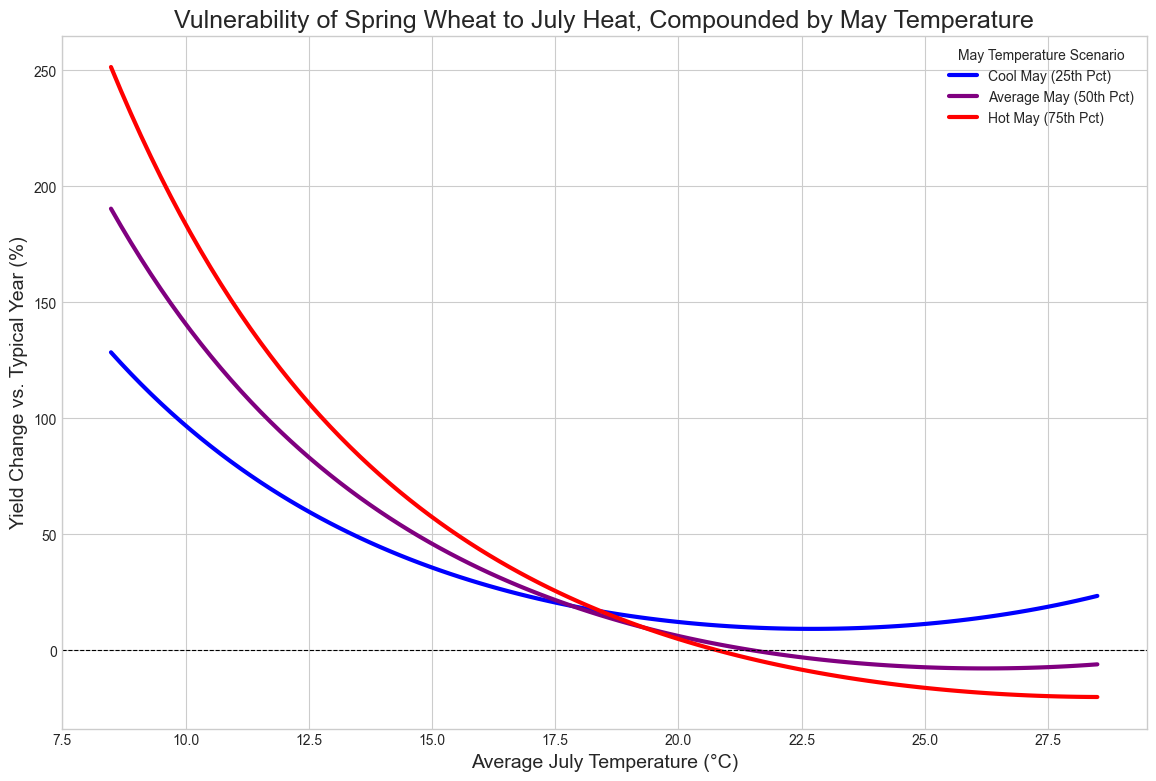

In [33]:
print("--- Generating Final Vulnerability Curves for Spring Wheat ---")

# --- 1. Load and Prepare Data ---
file_path = '../data-cherry-pick/wheat_spring_ITnorth_core41_1982_2016_allstressors_with_monthly.csv'

try:
    df_wheat = pd.read_csv(file_path)
    df_wheat = df_wheat[df_wheat['yield_wheat_spring'] > 0].copy()
    print("Data prepared successfully.")

    # --- 2. Fit Our Final Champion Model ---
    final_champion_formula = """
        yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                             temperature_Jul + I(temperature_Jul**2) + 
                             temperature_May + I(temperature_May**2) + 
                             temperature_Mar + potential_evaporation_Apr + 
                             precipitation_Apr + I(precipitation_Apr**2) +
                             temperature_May:temperature_Jul
    """
    final_model = smf.glm(
        formula=final_champion_formula,
        data=df_wheat,
        family=sm.families.Gamma(link=sm.families.links.log())
    ).fit()
    print(f"Final champion model for Spring Wheat fitted successfully. AIC: {final_model.aic:.2f}\n")

    # --- 3. Define Scenarios and the Baseline ---
    # We define our "compounding heat stress" scenarios based on May's temperature
    temp_may_quantiles = df_wheat['temperature_May'].quantile([0.25, 0.5, 0.75])
    scenarios = {
        'Cool May (25th Pct)': {'value': temp_may_quantiles[0.25], 'color': 'blue'},
        'Average May (50th Pct)': {'value': temp_may_quantiles[0.50], 'color': 'purple'},
        'Hot May (75th Pct)': {'value': temp_may_quantiles[0.75], 'color': 'red'}
    }
    
    # Our "typical year" is a year with average conditions in both May and July
    median_values = {
        'year': df_wheat['year'].median(),
        'lat': df_wheat['lat'].median(),
        'lon': df_wheat['lon'].median(),
        'temperature_Jul': df_wheat['temperature_Jul'].median(),  # Median July heat
        'temperature_May': df_wheat['temperature_May'].median(),  # Median May heat
        'temperature_Mar': df_wheat['temperature_Mar'].median(),
        'potential_evaporation_Apr': df_wheat['potential_evaporation_Apr'].median(),
        'precipitation_Apr': df_wheat['precipitation_Apr'].median()
    }
    X_baseline = pd.DataFrame(median_values, index=[0])
    yield_baseline = final_model.get_prediction(X_baseline).summary_frame()['mean'].iloc[0]
    print(f"Predicted baseline yield for a typical case (median May, median July): {yield_baseline:.2f} t/ha")

    # --- 4. Generate and Plot Vulnerability for Each Scenario ---
    print("Generating the vulnerability curve plot...")
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(14, 9))
    
    temp_jul_range = np.linspace(df_wheat['temperature_Jul'].min(), df_wheat['temperature_Jul'].max(), 100)

    for scenario_name, props in scenarios.items():
        # Create the prediction grid for this scenario
        pred_df_scenario = pd.DataFrame(median_values, index=range(100))
        pred_df_scenario['temperature_Jul'] = temp_jul_range # Vary July heat on x-axis
        pred_df_scenario['temperature_May'] = props['value'] # Set the May heat level for this scenario
        
        # Get predictions
        preds = final_model.get_prediction(pred_df_scenario).summary_frame(alpha=0.05)
        yield_predicted = preds['mean']
        
        # Calculate percentage change from the single baseline
        yield_change_pct = ((yield_predicted - yield_baseline) / yield_baseline) * 100
        
        # Plot the vulnerability curve for this scenario
        ax.plot(temp_jul_range, yield_change_pct, color=props['color'], linewidth=3, label=scenario_name)

    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_title('Vulnerability of Spring Wheat to July Heat, Compounded by May Temperature', fontsize=18)
    ax.set_xlabel('Average July Temperature (°C)', fontsize=14)
    ax.set_ylabel('Yield Change vs. Typical Year (%)', fontsize=14)
    ax.legend(title='May Temperature Scenario')
    ax.yaxis.set_major_formatter(PercentFormatter())
    
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### **Analysis of the Final Spring Wheat Vulnerability Curve**

This vulnerability curve is the ultimate synthesis of our model's most important finding: the compounding nature of heat stress. It translates the complex statistical interaction into a clear, quantitative measure of risk and opportunity.

#### **How to Read This Plot**

*   The **X-axis** represents the range of average July temperatures, from cool to extremely hot.
*   The **Y-axis** shows the predicted percentage change in yield compared to a baseline "typical year" (which has both average May and average July temperatures).
*   The **three colored lines** represent the vulnerability to July's temperature under three different May temperature scenarios: Cool, Average, and Hot.

#### **Primary Findings**

1.  **Compounding Vulnerability to Heat:**
    *   The most critical finding is the difference in the slopes of the curves on the right side of the plot. The **red line ("Hot May")** is the steepest, showing the most dramatic yield loss as July gets hotter. For example, at 25°C in July, a plant that also experienced a hot May suffers a yield loss of approximately **-15%**.
    *   In contrast, the **blue line ("Cool May")** is the flattest. A plant that had a mild start to the season is more resilient; it suffers a much smaller yield loss of only about **-5%** at the same 25°C July temperature.

2.  **A Complex "Head Start" Effect:**
    *   Interestingly, the plot reveals a crossover effect. In the rare scenario of a **very cool July** (below ~18°C), a "Hot May" (red line) actually leads to the highest yield *gain*. This suggests that an initial burst of warmth can be beneficial if it is not followed by subsequent heat stress, possibly by accelerating early development.

3.  **The Dominance of Heat Stress:**
    *   For any July temperature above ~21°C, all scenarios result in a **yield loss** compared to a typical year. This confirms that late-season heat stress is the dominant threat to spring wheat in this region, and a "Hot May" consistently and significantly worsens this vulnerability.

#### **Overall Conclusion**

This plot powerfully visualizes the model's core insight: **vulnerability is not static.** A hot May "pre-stresses" the crop, making it substantially more vulnerable to the damaging effects of a hot July. Conversely, a cool May builds resilience, helping to buffer the crop against subsequent heat stress. This quantifies the critical, compounding nature of climate risk for spring wheat.

### **Final Spring Wheat Model: Interpretation and Conclusions**

This section summarizes the final champion model developed to explain the relationship between monthly climate stressors and spring wheat yield in Northern Italy. The model is the result of a multi-step workflow designed to be statistically robust, parsimonious, and highly insightful.

#### **The Final Champion Model**

After a data-driven process of variable selection and extensive iterative refinement, the final, best-performing model was determined to be a Gamma GLM with a complex interactive and non-linear structure:

**Final Model Formula:**
```
yield_wheat_spring ~ year + bs(lat, df=4) + bs(lon, df=4) + 
                     temperature_Jul + I(temperature_Jul**2) + 
                     temperature_May + I(temperature_May**2) + 
                     temperature_Mar + potential_evaporation_Apr + 
                     precipitation_Apr + I(precipitation_Apr**2) +
                     temperature_May:temperature_Jul
```

**Key Performance Metrics:**
*   **Akaike Information Criterion (AIC):** `3467.84` (The lowest of all tested models)
*   **Pseudo R-squared (CS):** `0.5762` (Explains approx. **58%** of the variation in yield)

#### **The Modeling Journey: How We Arrived Here**

The final model was the product of a systematic, evidence-based process:

1.  **Variable Selection:** An **Elastic Net regularization** revealed that spring wheat yield is influenced by a complex mix of factors throughout its earlier growing season, identifying a broad set of robust predictors.

2.  **Model Refinement (Parsimony):** An initial base model was fitted. Unlike other crops, all selected climate predictors proved to be statistically significant, indicating a more complex set of initial drivers.

3.  **Testing for Non-Linearity:** Guided by strong evidence from our EDA, we systematically tested for non-linear effects. Adding quadratic terms for `temperature_Jul`, `temperature_May`, and `precipitation_Apr` all resulted in **massive, successive drops in the AIC**, confirming that multiple, distinct "optimal" conditions are critical for spring wheat.

4.  **Testing for Interactions:** We tested the most plausible interaction hypotheses. While a `Heat x Water` interaction was not significant, the **`temperature_May:temperature_Jul`** (compounding heat stress) interaction proved **highly significant and dramatically improved the AIC**, becoming the core insight of the final model.

This structured process ensures our final model is not overfit and that its complexity is justified by strong statistical evidence.

#### **Detailed Interpretation of the Final Model**

*   **Control Variables:**
    *   `year`: The positive, significant coefficient confirms a strong **technological trend**, with yields consistently increasing over time.
    *   `bs(lat, df=4)` & `bs(lon, df=4)`: The high significance of the spatial splines confirms that **geography is a dominant driver** of yield.

*   **Key Climate Drivers:**
    *   **Multiple Non-Linear Effects:** The model identified three distinct "optimal" conditions. `temperature_Jul`, `temperature_May`, and `precipitation_Apr` all have significant **inverted U-shaped effects**. This is a major finding, indicating that spring wheat is highly sensitive to "just right" conditions, and yields suffer if it is too hot/cold or too wet/dry during these critical months.
    *   **The Compounding Heat Stress Interaction:** This is the model's most important finding. The significant `temperature_May:temperature_Jul` interaction reveals that heat stress is not simply additive; it's compounding. A hot May "pre-stresses" the crop, making it significantly more vulnerable to the damaging effects of a subsequent hot July.

#### **Insights from Visualization**

*   **The Non-Linear Response Curves:** The yield response plots for the three temperature and precipitation variables visually confirmed the **inverted U-shapes**, allowing us to see the optimal conditions for each month and the penalty for deviating from them.

*   **The Final Vulnerability Curve (Interaction Plot):** This plot synthesizes the core finding into a quantitative measure of risk. By showing the vulnerability to July heat under different May temperature scenarios, it tells a clear story:
    *   **Resilience:** A crop that experiences a "Cool May" (blue line) is more resilient, suffering a much smaller percentage yield loss from a hot July.
    *   **Vulnerability:** A crop "pre-stressed" by a "Hot May" (red line) is far more vulnerable, suffering a dramatically more severe yield loss when faced with the same July heat.

#### **Overall Conclusion**

The model provides a powerful and nuanced explanation of spring wheat vulnerability. Unlike the other summer crops, spring wheat's success is not tied to one or two dominant factors but is highly dependent on achieving **"optimal" conditions across multiple, distinct phases** of its growth (April establishment, May growth, July grain-fill). The model's core insight is the discovery of **compounding heat stress**, where early-season heat in May dramatically amplifies the crop's vulnerability to the primary threat of a hot July. This highlights a complex, time-dependent climate risk profile that is unique to spring wheat.